In [3]:
from param_analysis import ParameterAnalysis
from plots import *

What I have found so far is that with really high ecb values like 9, agents make up their mind super quickly. then they only tweet one thing no matter what they read, they end up tweeting whatever is the majority belief of their neighbours, and they don't bother choosing not to sample the agents that disagree because the amount which these agents affect their beliefs has negligible towards actually changing opinion. 

In contrast with lower ecb values like 5, agents can tend to never make up their minds. 

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def obj_array(shape):
    
    return np.empty(shape, dtype=object)

all_parameters_to_store = obj_array((30, 4,4,4,4,4, 4, 4))
all_results_to_store = obj_array((30, 4,4,4,4,4, 4, 4))


In [7]:
all_results_to_store[0,0,0,0,0,0,0,0] = 0.5

In [1]:


connectedness_values = [0.3,0.5,0.7,0.8]
ecb_precision_gammas = [7,8,9]

num_agent_values = [6,7,8,9]

n = len(num_agent_values)
c = len(connectedness_values)
#precision_ranges = [[1,2],[1,5],[1,9],[6,7],[6,10]]
env_precision_gammas = [10]
b_precision_gammas = [3,4,5,6,7,8]

n_trials = 30

In [2]:
params = ParameterAnalysis('results/testr2.npz','results/testp2.npz', num_agent_values, connectedness_values, ecb_precision_gammas, env_precision_gammas, b_precision_gammas, n_trials)

NameError: name 'ParameterAnalysis' is not defined

In [5]:
params.n_d.value = num_agent_values[1]
params.env_d.value = env_precision_gammas[0]
params.b_d.value = b_precision_gammas[0]
params.c_d.value = connectedness_values[1]
params.ecb_d.value = ecb_precision_gammas[-1]

In [6]:
params.param_results.shape

(30, 3, 7, 6, 6, 6)

In [7]:
params.get_overall_metrics()

/vol/bitbucket/att21/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/vol/bitbucket/att21/venv/lib/python3.8/site-packages/numpy/core/_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/vol/bitbucket/att21/venv/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [8]:
def get_params(param_values):
    n = num_agent_values.index(param_values[0])
    c = connectedness_values.index(param_values[1])
    ecb = ecb_precision_gammas.index(param_values[2])
    env = 0
    b = 0
    ecb_precision = params.param_results[0,n,c,ecb,env,b][0][0]
    env_precision = params.param_results[0,n,c,ecb,env,b][0][1]
    b_precision = params.param_results[0,n,c,ecb,env,b][0][2]
    idea_mappings = [params.param_results[0,n,c,ecb,env,b][i][3] for i in range(param_values[0])]
    return (ecb_precision, env_precision, b_precision),idea_mappings

In [9]:
lowest_db_index = np.where(params.db_indices == min(params.db_indices))[0][0]

print("Lowest DB index")
db_params = list(params.get_param_combinations())[lowest_db_index]
print(db_params)
print(params.db_indices[lowest_db_index])
print(get_params(db_params))


Lowest DB index
(8, 0.2, 5, 5, 10)
0.4482541874142912
((array(6.27173834), array(8.48433653), array(1.18447132)), [array([[0.85470169, 0.14529831],
       [0.14529831, 0.85470169]]), array([[0.90540689, 0.09459311],
       [0.09459311, 0.90540689]]), array([[0.94255064, 0.05744936],
       [0.05744936, 0.94255064]]), array([[0.64475922, 0.35524078],
       [0.35524078, 0.64475922]]), array([[0.61634455, 0.38365545],
       [0.38365545, 0.61634455]]), array([[0.81716899, 0.18283101],
       [0.18283101, 0.81716899]]), array([[0.93133855, 0.06866145],
       [0.06866145, 0.93133855]]), array([[0.87971106, 0.12028894],
       [0.12028894, 0.87971106]])])


In [10]:
clustering_data = {}

for c in connectedness_values:
    #find all parameter combinations with this connectedness value
    c_indices = np.where(np.isin(np.array(list(params.get_param_combinations()))[:,1],c))[0]
    #what are the db indices for these parameters?
    c_db_indices = params.db_indices[c_indices]
    #what is the smallest one?
    lowest_db_index = np.where(c_db_indices == min(c_db_indices))[0][0]
    highest_db_index = np.where(c_db_indices == max(c_db_indices))[0][0]
    #print(c_db_indices[lowest_db_index])
    
    #what is the parameter combination that results in the smallest one?
    optimal_params = list(params.get_param_combinations())[c_indices[lowest_db_index]]
    suboptimal_params = list(params.get_param_combinations())[c_indices[highest_db_index]]
   # (ecb_precision_opt, env_precision_opt, b_precision_opt),idea_mappings_opt = get_params(optimal_params)
 #   (ecb_precision_sopt, env_precision_sopt, b_precision_sopt),idea_mappings_sopt = get_params(suboptimal_params)

    
    clustering_data[c] = {"optimal_params" : optimal_params, "lowest_db":c_db_indices[lowest_db_index],
                         # "real_params_opt" : (ecb_precision_opt, env_precision_opt, b_precision_opt),
                          
                         "suboptimal_params": suboptimal_params, "highest_db" : c_db_indices[highest_db_index]}
                         
                        # "real_params_subopt": (ecb_precision_sopt, env_precision_sopt, b_precision_sopt) }



In [11]:
#officially confirmed that high ECB leads to clustering, low ECB leads to no clustering. 
#any sparseness can lead to clustering, but generally lots of agents in a sparse graphleads to clustering, and less agents in a non sparse graph leads to no clustering

#the question now is: why?

In [12]:
clustering_data

{0.2: {'optimal_params': (8, 0.2, 5, 5, 10),
  'lowest_db': 0.4482541874142912,
  'suboptimal_params': (4, 0.2, 8, 5, 10),
  'highest_db': 0.9351897155891004},
 0.3: {'optimal_params': (8, 0.3, 4, 5, 10),
  'lowest_db': 0.4701443591370528,
  'suboptimal_params': (4, 0.3, 8, 5, 10),
  'highest_db': 0.9666666667897383},
 0.4: {'optimal_params': (4, 0.4, 4, 5, 10),
  'lowest_db': 0.5481881683186212,
  'suboptimal_params': (4, 0.4, 7, 5, 10),
  'highest_db': 0.985566270133593},
 0.5: {'optimal_params': (6, 0.5, 4, 5, 10),
  'lowest_db': 0.6216354675291875,
  'suboptimal_params': (4, 0.5, 8, 5, 10),
  'highest_db': 1.0},
 0.6: {'optimal_params': (8, 0.6, 4, 5, 10),
  'lowest_db': 0.5962219357850361,
  'suboptimal_params': (4, 0.6, 9, 5, 10),
  'highest_db': 1.0},
 0.7: {'optimal_params': (8, 0.7, 4, 5, 10),
  'lowest_db': 0.5595113332785628,
  'suboptimal_params': (6, 0.7, 7, 5, 10),
  'highest_db': 0.9734854000740787},
 0.8: {'optimal_params': (8, 0.8, 4, 5, 10),
  'lowest_db': 0.623740873

In [13]:
clustering_data = {}

for ecb in ecb_precision_gammas:
    #find all parameter combinations with this connectedness value
    ecb_indices = np.where(np.isin(np.array(list(params.get_param_combinations()))[:,2],ecb))[0]
    #what are the db indices for these parameters?
    ecb_db_indices = params.db_indices[ecb_indices]
    
    #what is the smallest one?
    lowest_db_index = np.where(ecb_db_indices == min(ecb_db_indices))[0][0]
    highest_db_index = np.where(ecb_db_indices == max(ecb_db_indices))[0][0]
    #print(c_db_indices[lowest_db_index])
        #what is the parameter combination that results in the smallest one?
    optimal_params = list(params.get_param_combinations())[ecb_indices[lowest_db_index]]
    suboptimal_params = list(params.get_param_combinations())[ecb_indices[highest_db_index]]
    #(ecb_precision_opt, env_precision_opt, b_precision_opt),idea_mappings_opt = get_params(optimal_params)
    #(ecb_precision_sopt, env_precision_sopt, b_precision_sopt),idea_mappings_sopt = get_params(suboptimal_params)

    
    clustering_data[ecb] = {"optimal_params" : optimal_params, "lowest_db":ecb_db_indices[lowest_db_index],
                       #   "real_params_opt" : (ecb_precision_opt, env_precision_opt, b_precision_opt),
                          
                         "suboptimal_params": suboptimal_params, "highest_db" : ecb_db_indices[highest_db_index]}
                         
                      #   "real_params_subopt": (ecb_precision_sopt, env_precision_sopt, b_precision_sopt) }



In [14]:
def similarity_matrix(belief_hist):
    T = belief_hist.shape[0]

    KLD_intra_beliefs = get_KLDs(belief_hist)
    believers = np.where(belief_hist[-1,0,:] > 0.5)
    nonbelievers = np.where(belief_hist[-1,0,:] < 0.5)
    cluster_sorted_indices = [i for i in believers[0]]
    for j in nonbelievers[0]:
        cluster_sorted_indices.append(j)

    
    color_map = plt.cm.get_cmap('gray').reversed()


    single_slice = KLD_intra_beliefs[:,:,-1]
    sorted_slice = single_slice[cluster_sorted_indices,:][:,cluster_sorted_indices]
    plt.imshow(sorted_slice, cmap = color_map)
    plt.title("Belief similarity matrix")
    plt.show()
    plt.clf()

In [15]:
clustering_data

{4: {'optimal_params': (8, 0.3, 4, 5, 10),
  'lowest_db': 0.4701443591370528,
  'suboptimal_params': (4, 0.8, 4, 5, 10),
  'highest_db': 0.8355244512737297},
 5: {'optimal_params': (8, 0.2, 5, 5, 10),
  'lowest_db': 0.4482541874142912,
  'suboptimal_params': (4, 0.8, 5, 5, 10),
  'highest_db': 0.9055974803966914},
 6: {'optimal_params': (8, 0.2, 6, 5, 10),
  'lowest_db': 0.6546700028082587,
  'suboptimal_params': (6, 0.8, 6, 5, 10),
  'highest_db': 0.942341356494786},
 7: {'optimal_params': (6, 0.4, 7, 5, 10),
  'lowest_db': 0.6184238263794098,
  'suboptimal_params': (4, 0.4, 7, 5, 10),
  'highest_db': 0.985566270133593},
 8: {'optimal_params': (8, 0.2, 8, 5, 10),
  'lowest_db': 0.613248453186691,
  'suboptimal_params': (4, 0.5, 8, 5, 10),
  'highest_db': 1.0},
 9: {'optimal_params': (8, 0.2, 9, 5, 10),
  'lowest_db': 0.571753836263273,
  'suboptimal_params': (4, 0.6, 9, 5, 10),
  'highest_db': 1.0}}

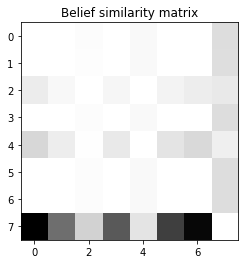

<Figure size 432x288 with 0 Axes>

In [16]:
optimal_params = [8, 0.6, 9, 5, 10]
params.update_params(optimal_params)
params.get_all_sim_results_from_parameters()
beliefs = params.all_qs
kld_matrices = similarity_matrix(beliefs[16,:,:,:])

In [17]:
def get_agent_data(agent, result, cluster1, cluster2):
    agent_adj_mat = result['adj_mat'][:,agent,:]
    agent_beliefs = result['all_qs'][:,:,:,agent]
    agent_samplings = result['all_neighbour_sampling'][:,:,agent]
    agent_tweets = result['all_tweets'][:,:,agent]
    agent_cluster = cluster1[0] if agent in cluster1[0] else cluster2[0]
    other_cluster = cluster1[0] if agent not in cluster1[0] else cluster2[0]
    neighbours = list(is_connected(agent_adj_mat[0])[0])
    outsider_neighbours = np.intersect1d(neighbours, other_cluster)
    insider_neighbours = np.intersect1d(neighbours, agent_cluster)
    
    agent_data = (agent_adj_mat, agent_beliefs, agent_samplings, agent_tweets, agent_cluster, other_cluster, neighbours, outsider_neighbours, insider_neighbours)
    return agent_data

def find_one_agent_two_neighbours_opposite_cluster(parameters, condition = True, trial = None, agent = None):
    params.update_params(parameters)
    beliefs = params.all_qs
    result = params.get_all_sim_results_from_parameters()
    if condition == True:
        for trial in range(30):
            #what are the clusters? 
            all_beliefs_t = beliefs[trial,:,:,:] 
            cluster1 = np.where(all_beliefs_t[-1,1,:] > 0.5)
            cluster2 = np.where(all_beliefs_t[-1,1,:] < 0.5)
            for agent in range(parameters[0]):
                agent_data = get_agent_data(agent,result, cluster1, cluster2)
                if len(agent_data[-3]) == 2 and len(agent_data[-2]) == 1 and len(agent_data[-1]) == 1:
                    print("Found condition!")
                    return result, trial, agent, cluster1, cluster2, agent_data
    else:
        all_beliefs_t = beliefs[trial,:,:,:] 
        cluster1 = np.where(all_beliefs_t[-1,1,:] > 0.5)
        cluster2 = np.where(all_beliefs_t[-1,1,:] < 0.5)
        agent_data = get_agent_data(agent,result, cluster1, cluster2)
                    
        return result, trial, agent, cluster1, cluster2, agent_data
            

In [18]:
def is_connected(adj_mat):
    return np.where(adj_mat == 1)

In [54]:
test_params = [4, 0.3, 5, 5, 10]
params.update_params(test_params)
beliefs = params.all_qs


In [67]:
result, trial, agent, cluster1, cluster2, agent_data = find_one_agent_two_neighbours_opposite_cluster(test_params)

Found condition!


In [56]:
result, trial, agent, cluster1, cluster2, agent_data = find_one_agent_two_neighbours_opposite_cluster(test_params, False, 3, 3)

In [68]:
agent_data[4:]

(array([0, 3]), array([1, 2]), [2, 3], array([2]), array([3]))

In [69]:
(agent_adj_mat, agent_beliefs, agent_samplings, agent_tweets, agent_cluster, other_cluster, neighbours, outsider_neighbours, insider_neighbours) = agent_data

In [70]:
print(get_params(test_params))

((array(4.93096878), array(11.92733474), array(6.89882648)), [array([[0.84297937, 0.15702063],
       [0.15702063, 0.84297937]]), array([[0.5890606, 0.4109394],
       [0.4109394, 0.5890606]]), array([[0.80797176, 0.19202824],
       [0.19202824, 0.80797176]]), array([[0.92502306, 0.07497694],
       [0.07497694, 0.92502306]])])


In [71]:
outsider_indices = [np.where(agent_samplings[trial] == i) for i in outsider_neighbours]
insider_indices = [np.where(agent_samplings[trial] == i) for i in insider_neighbours]

In [72]:
insider_indices

[(array([ 2,  3,  5,  6,  7,  8, 10, 12, 13, 14, 15, 16, 17, 18, 19, 21, 23,
         25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]),)]

Text(0.5, 1.0, 'Periodic sampling behaviour')

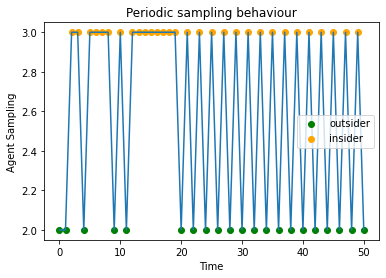

In [73]:
plt.plot(range(51), agent_samplings[trial])
if len(outsider_indices) > 0:
    for j in range(len(outsider_indices)):
        plt.scatter(outsider_indices[j], np.tile(outsider_neighbours[j], len(outsider_indices[j][0])), color = 'green', label = "outsider")
for i in range(len(insider_neighbours)):
    plt.scatter(insider_indices[i][0], np.tile(insider_neighbours[i], len(insider_indices[i][0])), color = 'orange', label = "insider")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Agent Sampling")
plt.title("Periodic sampling behaviour")

In [74]:
agent_reads = [result['all_tweets'][trial,t,int(a)] for t,a in enumerate(agent_samplings[trial,:])]

In [75]:
agent_samplings[trial]

array([2., 2., 3., 3., 2., 3., 3., 3., 3., 2., 3., 2., 3., 3., 3., 3., 3.,
       3., 3., 3., 2., 3., 2., 3., 2., 3., 2., 3., 2., 3., 2., 3., 2., 3.,
       2., 3., 2., 3., 2., 3., 2., 3., 2., 3., 2., 3., 2., 3., 2., 3., 2.])

In [76]:
behaviour = [( agent_tweets[trial][t], agent_reads[t], agent_beliefs[trial,:,0][t], (agent_beliefs[trial,:,0][t] - agent_beliefs[trial,:,0][t-1] )) for t in range(1,len(agent_reads)-1)]

In [77]:
behaviour

[(1.0, 1.0, 0.47416473661561936, -0.01895760366852406),
 (1.0, 1.0, 0.4553064507869403, -0.018858285828679044),
 (1.0, 1.0, 0.43850973336894894, -0.01679671741799138),
 (1.0, 1.0, 0.4225755034566476, -0.015934229912301312),
 (1.0, 0.0, 0.44716127581113135, 0.024585772354483726),
 (1.0, 0.0, 0.4694523451483783, 0.02229106933724695),
 (1.0, 0.0, 0.48954092267217836, 0.020088577523800055),
 (1.0, 0.0, 0.507771345843751, 0.018230423171572696),
 (0.0, 1.0, 0.49014503511520235, -0.0176263107285487),
 (1.0, 0.0, 0.5075300030103403, 0.017384967895137993),
 (0.0, 1.0, 0.4905423078349122, -0.01698769517542814),
 (1.0, 1.0, 0.4666776468970599, -0.023864660937852333),
 (1.0, 1.0, 0.4453347193615798, -0.02134292753548006),
 (1.0, 1.0, 0.4265684881425157, -0.018766231219064122),
 (1.0, 1.0, 0.4101157732010357, -0.016452714941479984),
 (1.0, 0.0, 0.4341797007225856, 0.0240639275215499),
 (1.0, 0.0, 0.45603492340520996, 0.021855222682624353),
 (1.0, 0.0, 0.47586865232714165, 0.019833728921931693),
 (1

So two general behaviours are possible: Either an agent will form a conclusion by choosing to more frequently sample within one cluster group than the other, or they will continue to sample from both cluster groups and remain centrist. In both cases, agents will choose their own leaning - only to tweet one hashtag over the other, but will continue to sample both leanings, to varying frequencies based on their beliefs.  